# Stations

In [15]:
import mpl_toolkits
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import pickle
import os
import math

import obspy
from obspy import read
from scipy import signal
from obspy.core.trace import Trace
from obspy import UTCDateTime
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import read_inventory
from obspy.geodetics.base import gps2dist_azimuth
from skimage.measure import block_reduce
from scipy import signal
from sklearn.preprocessing import Normalizer
#from obspy.core.util import (BASEMAP_VERSION, CARTOPY_VERSION,
#                             MATPLOTLIB_VERSION, PROJ4_VERSION)

In [2]:
# Use the station service to access station metadata from GeoNet stations. 
client = FDSN_Client("GEONET")

In [3]:
# This example gets all stations.
inventory = client.get_stations(starttime = "2016-01-01 00:00:00.000", level="response", location="10", channel="HHZ")

C:\Programming\Earthquake\myenv\lib\site-packages\obspy\io\stationxml\core.py:91: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


In [4]:
inventory

Inventory created at 2022-05-27T04:22:32.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (539):
			NZ.ABAZ (Army Bay)
			NZ.ADCS (Ashburton District Council)
			NZ.AKCZ (Akaroa Harbour)
			NZ.AKSS (Akaroa School)
			NZ.AKUS (Auckland University School of Engineering)
			NZ.ALRZ (Allen Road)
			NZ.AMBC (Amberley HDC)
			NZ.AMCZ (Amberley)
			NZ.ANWZ (Angora Road)
			NZ.APPS (Arthurs Pass Police Station)
			NZ.APZ (The Paps)
			NZ.ARAZ (Aratiatia Landcorp Farm)
			NZ.ARCZ (Arundel)
			NZ.ARHZ (Aropaoanui)
			NZ.ARKS (Wainuiomata Arakura School)
			NZ.ARPS (Arnold River Power Station)
			NZ.ASHS (Ashley School)
			NZ.AUCT (Auckland)
			NZ.AWAZ (Awhitu Peninsula)
			NZ.AWRB (Awatere Bridge SH1)
			NZ.BBCX (Breaker Bay Cliff)
			NZ.BCKZ (Boat Cove)
			NZ.BDCS (Balclutha District Council)
			NZ.BFZ (Birch Farm)
			NZ.BHHZ (Black Hill Station)
			NZ.BHW (Baring Head)
			NZ.BKZ (Black Stump Farm)
			NZ.BMTS (Belmont)
		

In [5]:
stations_network = inventory[0]
stations_network

Network NZ (New Zealand National Seismograph Network)
	Station Count: 94/2120 (Selected/Total)
	1884-02-01T00:00:00.000000Z - --
	Access: open
	Contains:
		Stations (94):
			NZ.APZ (The Paps)
			NZ.BFZ (Birch Farm)
			NZ.BHW (Baring Head)
			NZ.BKZ (Black Stump Farm)
			NZ.COVZ (Chateau Observatory)
			NZ.CTZ (Chatham Island)
			NZ.CVZ (Cave)
			NZ.DCZ (Deep Cove)
			NZ.DSZ (Denniston North)
			NZ.EAZ (Earnscleugh)
			NZ.ETVZ (East Tongariro)
			NZ.FWVZ (Far West)
			NZ.GLKZ (Green Lake)
			NZ.GRZ (Great Barrier Island)
			NZ.GVZ (Greta Valley)
			NZ.HAZ (Te Kaha)
			NZ.HD11 (HADES 11)
			NZ.HD50 (HADES 50)
			NZ.HD51 (HADES 51)
			NZ.HD53 (HADES 53)
			NZ.HD54 (HADES 54)
			NZ.HD55 (HADES 55)
			NZ.HD56 (HADES 56)
			NZ.HD57 (HADES 57)
			NZ.HD58 (HADES 58)
			NZ.HD59 (HADES 59)
			NZ.HD61 (HADES 61)
			NZ.HD62 (HADES 62)
			NZ.HD63 (HADES 63)
			NZ.HD64 (HADES 64)
			NZ.HD65 (HADES 65)
			NZ.HD71 (HADES 71)
			NZ.HD73 (HADES 73)
			NZ.HD80 (HADES 80)
			NZ.HD81 (HADES 81)
			NZ.HD83 

In [6]:
first_station = stations_network[0]
first_station

Station APZ (The Paps)
	Station Code: APZ
	Channel Count: 2/27 (Selected/Total)
	2006-05-07T00:00:00.000000Z - 
	Access: open 
	Latitude: -46.83, Longitude: 167.99, Elevation: 601.0 m
	Available Channels:
		APZ.10.HHZ (2x)

In [8]:
# NZ bounding box
min_lat = -47.749
max_lat = -33.779
min_long = 166.104
max_long = 178.990

In [9]:
# Create a data frame for each station
stations = []
longitudes = []
latitudes = []
sites = []

for station in stations_network:
    stations.append(station.code)
    latitudes.append(station.latitude)
    longitudes.append(station.longitude)
    sites.append(station.site.name)
    
data_map = {'station_code': stations, 'longitude':longitudes, 'latitude':latitudes, 'site':sites}
df = pd.DataFrame(data=data_map)

# use New Zealand bounding box coordinates to get the stations
df = df[(df['longitude'] >= min_long) & (df['longitude'] <= max_long)]
df = df[(df['latitude'] >= min_lat) & (df['latitude'] <= max_lat)]
df.head()

,station_code,longitude,latitude,site
0,APZ,167.988825,-46.831806,The Paps
1,BFZ,176.246245,-40.679647,Birch Farm
2,BHW,174.871115,-41.408231,Baring Head
3,BKZ,176.492544,-39.165666,Black Stump Farm
4,COVZ,175.542402,-39.199914,Chateau Observatory


In [10]:
# number of stations
df.shape

(91, 4)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

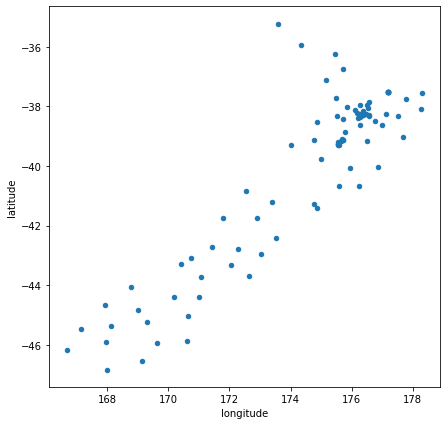

In [11]:
# plot stations 
df.plot(x="longitude", y="latitude", kind="scatter", figsize=(7,7))

C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Programming\Earthquake\myenv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


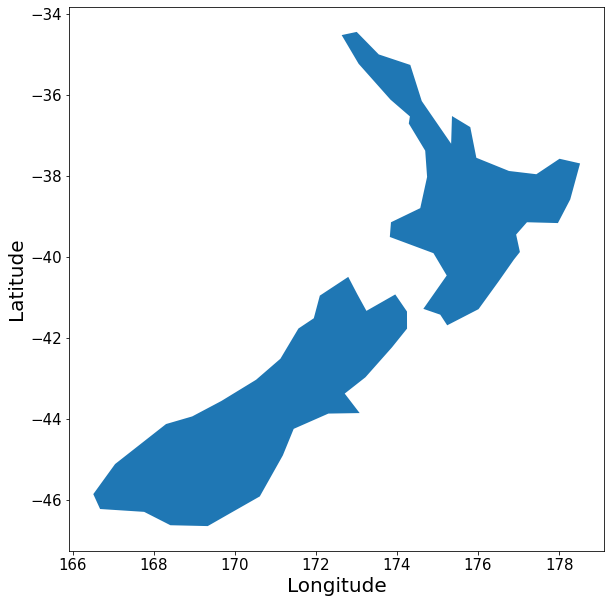

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = countries[countries["name"] == "New Zealand"].plot(ax=ax)
ax.tick_params(axis='both', labelsize=15)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
del ax

C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Programming\Earthquake\myenv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\Admin\AppData\Local\Temp\ipykernel_48920\417252144.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' sin

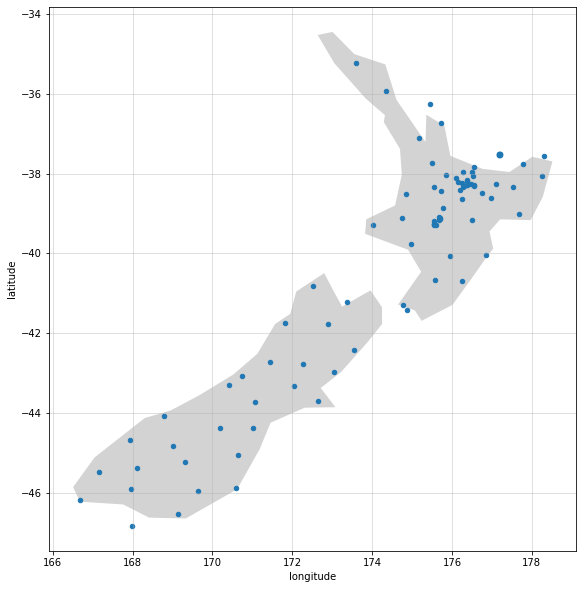

In [13]:
# plot NZ map with stations
fig, ax = plt.subplots(figsize=(10,10))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

ax = countries[countries["name"] == "New Zealand"].plot(color="lightgrey", ax=ax)
df.plot(x="longitude", y="latitude", kind="scatter", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)
plt.show()
del ax

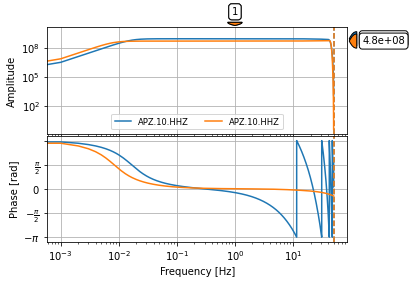

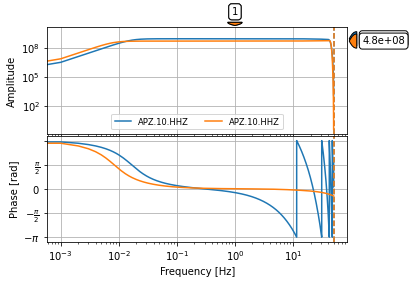

In [37]:
first_station.plot(0.001,output="VEL")

In [82]:
#WIZ can not be received
#selected_58_stations = ['BFZ', 'BHW', 'BKZ', 'COVZ', 'CVZ', 'DCZ', 'DSZ', 'EAZ', 'ETVZ', 'FWVZ',
#              'GRZ', 'GVZ', 'HAZ', 'HIZ', 'HD62', 'INZ', 'JCZ', 'KHEZ', 'KHZ', 'KNZ', 'KUZ', 
#               'LBZ','LTZ', 'MLZ', 'MQZ', 'MRZ', 'MSZ', 'MWZ', 'MXZ', 'NNZ', 'ODZ', 
#               'OPRZ', 'OPZ','OUZ', 'OXZ', 'PUZ', 'PXZ', 'QRZ', 'RATZ', 'RPZ', 'RTZ', 
#               'SYZ', 'THZ', 'TLZ','TMVZ', 'TOZ', 'TRVZ', 'TSZ', 'TUZ', 'URZ', 'VRZ'
#               , 'WCZ', 'WEL', 'WHVZ', 'WHZ', 'WIZ', 'WKZ', 'WSRZ', 'WVZ', 'WI13']
selected_58_stations = ['BFZ', 'BKZ', 'DCZ', 'DSZ', 'EAZ', 'HIZ', 'JCZ', 'KHZ', 'KNZ', 'KUZ', 'LBZ', 'LTZ', 'MLZ',
                         'MQZ', 'MRZ', 'MSZ', 'MWZ', 'MXZ', 'NNZ', 'ODZ', 'OPRZ', 'OUZ', 'PUZ', 'PXZ', 'QRZ', 'RPZ',
                         'SYZ', 'THZ', 'TOZ', 'TSZ', 'TUZ', 'URZ', 'VRZ', 'WCZ', 'WHZ', 'WIZ', 'WKZ', 'WVZ']
selected_58_stations = ['BFZ', 'BKZ', 'DCZ', 'DSZ', 'HIZ', 'JCZ', 'KHZ', 'KUZ', 'LBZ',
                        'MSZ', 'MWZ', 'MXZ', 'NNZ', 'ODZ', 'OPRZ', 'OUZ', 'PUZ', 'PXZ', 'QRZ', 'RPZ',
                         'SYZ', 'THZ', 'TOZ', 'URZ', 'VRZ', 'WIZ', 'WKZ', 'WVZ']

In [13]:
df_58 = df.loc[df.station_code.isin(selected_58_stations)]

NameError: name 'df' is not defined

In [14]:
print(df_58.shape[0])
df_58.head()

NameError: name 'df_58' is not defined

In [85]:
df_58.to_pickle('data/stations_processed.pkl')

C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Programming\Earthquake\myenv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\Admin\AppData\Local\Temp\ipykernel_48920\3785693725.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' si

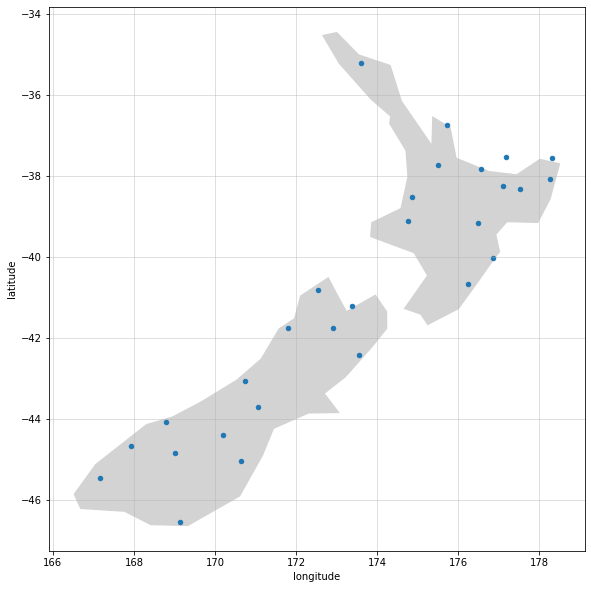

In [86]:
# plot NZ map with stations
fig, ax = plt.subplots(figsize=(10,10))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

ax = countries[countries["name"] == "New Zealand"].plot(color="lightgrey", ax=ax)
df_58.plot(x="longitude", y="latitude", kind="scatter", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)
plt.show()
del ax

## Data analysis

In [29]:
START_TIME = "2016-01-01 00:00:00.000"
cat = client.get_events(starttime=START_TIME, endtime="2016-06-01 00:00:00.000", minlatitude=-47.749, maxlatitude=-33.779, minlongitude=166.104, maxlongitude=178.990)
cat.extend(cat)
print('done')


KeyboardInterrupt



In [79]:

def my_pickle():
    magnitudes = []
    longitudes = []
    latitudes = []
    depths = []
    
    for event in cat:
        magnitudes.append(event.preferred_magnitude().mag)
        latitudes.append(event.preferred_origin().latitude)
        longitudes.append(event.preferred_origin().longitude)
        depths.append(event.preferred_origin().depth)
        
    data_map = {'magnitude': magnitudes, 'longitude':longitudes, 'latitude':latitudes, 'depth':depths}
    df = pd.DataFrame(data=data_map)
    
    df = df[(df['longitude'] >= min_long) & (df['longitude'] <= max_long)]
    df = df[(df['latitude'] >= min_lat) & (df['latitude'] <= max_lat)]
    df.head()
    df.to_pickle('data/events.pkl')
from datetime import timedelta, datetime

def download_events(starttime, endtime):
    print('starting download from ', starttime, ' to ', endtime)
    cat = client.get_events(starttime=starttime, endtime=endtime, minlatitude=-47.749, maxlatitude=-33.779, minlongitude=166.104, maxlongitude=178.990)
    print("done")
    return cat
def get_all_events(starttime, endtime, step):
    cat = None
    cur = starttime
    while cur < endtime:
        next_time = cur + step
        if next_time > endtime:
            next_time = endtime
        cur_cat = download_events(cur, next_time)
        if cat is None:
            cat = cur_cat
        else:
            cat.extend(cur_cat)
        #with open('event_temp', 'wb') as file:
        #    pickle.dump(cat, file)
        cur = next_time
    print("done with all downloads")
    return cat
    


cat = get_all_events(datetime(2015, 12, 31), datetime(2019, 12, 31), timedelta(days=30))
save_cat(cat)

starting download from  2015-12-31 00:00:00  to  2016-01-30 00:00:00
done
starting download from  2016-01-30 00:00:00  to  2016-02-29 00:00:00
done
starting download from  2016-02-29 00:00:00  to  2016-03-30 00:00:00
done
starting download from  2016-03-30 00:00:00  to  2016-04-29 00:00:00
done
starting download from  2016-04-29 00:00:00  to  2016-05-29 00:00:00
done
starting download from  2016-05-29 00:00:00  to  2016-06-28 00:00:00
done
starting download from  2016-06-28 00:00:00  to  2016-07-28 00:00:00
done
starting download from  2016-07-28 00:00:00  to  2016-08-27 00:00:00
done
starting download from  2016-08-27 00:00:00  to  2016-09-26 00:00:00
done
starting download from  2016-09-26 00:00:00  to  2016-10-26 00:00:00
done
starting download from  2016-10-26 00:00:00  to  2016-11-25 00:00:00
done
starting download from  2016-11-25 00:00:00  to  2016-12-25 00:00:00
done
starting download from  2016-12-25 00:00:00  to  2017-01-24 00:00:00
done
starting download from  2017-01-24 00:

AttributeError: 'NoneType' object has no attribute 'time'

In [81]:
def save_cat(cat):
    event_ids = []
    event_times = []
    latitudes = []
    longitudes = []
    magnitudes = []
    depths = []
    
    
    for i in range(len(cat)):
        earthquakeEvent = cat[i]
        
        if earthquakeEvent.preferred_origin() is None:
            continue
        
        event_id = earthquakeEvent.resource_id.id
        event_time = earthquakeEvent.preferred_origin().time
        latitude = earthquakeEvent.preferred_origin().latitude
        longitude = earthquakeEvent.preferred_origin().longitude
        magnitude = round(earthquakeEvent.preferred_magnitude().mag, 1)
        depth = round(earthquakeEvent.preferred_origin().depth / 1000)
    
        event_ids.append(event_id)
        event_times.append(event_time)
        latitudes.append(latitude)
        longitudes.append(longitude)
        magnitudes.append(magnitude)
        depths.append(depth)
    
    data_map = {'event_id': event_ids, 'time': event_times, 'latitude': latitudes, 'longitude': longitudes, 'magnitude': magnitudes, 'depth': depths}
    df = pd.DataFrame(data=data_map)
    df.to_pickle('events.pkl')
save_cat(cat)

## Event processing

In [12]:
events_df = pd.read_pickle('data/events.pkl')
stations = pd.read_pickle('data/stations_processed.pkl')
events_df.head()

,event_id,time,latitude,longitude,magnitude,depth
0,smi:nz.org.geonet/2015p985097,2015-12-31T11:39:47.395464Z,-39.105506,175.042388,1.4,10
1,smi:nz.org.geonet/2015p985703,2015-12-31T17:02:45.038509Z,-41.705157,174.037555,2.1,14
2,smi:nz.org.geonet/2015p984663,2015-12-31T07:48:49.637421Z,-38.876199,176.868264,1.9,21
3,smi:nz.org.geonet/2015p984478,2015-12-31T06:10:01.894305Z,-40.991698,175.506173,2.0,11
4,smi:nz.org.geonet/2015p985195,2015-12-31T12:32:16.627227Z,-39.738560,176.481691,1.6,18


In [109]:
# total earthquakes (123165)
events_df.shape

(99345, 6)

In [110]:
# filter out rows that dont have one of the data features
events_df = events_df[events_df.latitude != -1]
events_df = events_df[events_df.longitude != -1]
events_df = events_df[events_df.magnitude != -1]
events_df = events_df[events_df.depth != -1]

In [111]:
# total earthquakes after filtering (122465)
events_df.shape

(99345, 6)

In [112]:
# assing each event a close station
distances = []#np.empty(len(events_df), dtype=np.str_) #'|S5'
for index, event in events_df.iterrows():
    if index % 1000 == 0: print("done with ", index)
    #if index > 100: break;
    min_distance = 10 ** 7
    closest_station = ""
    for _, station in stations.iterrows():
        dist = gps2dist_azimuth(event['latitude'], event['longitude'], station['latitude'], station['longitude'])[0]
        if dist < min_distance:
            closest_station = station['station_code']
            min_distance = dist
    if min_distance < 270000:
        #distances[index] = closest_station
        distances.append(closest_station)
    else:
        distances.append('')


done with  0
done with  1000
done with  2000
done with  3000
done with  4000
done with  5000
done with  6000
done with  7000
done with  8000
done with  9000
done with  10000
done with  11000
done with  12000
done with  13000
done with  14000
done with  15000
done with  16000
done with  17000
done with  18000
done with  19000
done with  20000
done with  21000
done with  22000
done with  23000
done with  24000
done with  25000
done with  26000
done with  27000
done with  28000
done with  29000
done with  30000
done with  31000
done with  32000
done with  33000
done with  34000
done with  35000
done with  36000
done with  37000
done with  38000
done with  39000
done with  40000
done with  41000
done with  42000
done with  43000
done with  44000
done with  45000
done with  46000
done with  47000
done with  48000
done with  49000
done with  50000
done with  51000
done with  52000
done with  53000
done with  54000
done with  55000
done with  56000
done with  57000
done with  58000
done with 

In [113]:
print(distances[0:10])
events_df['closest_station'] = distances
print(len(events_df))
events_df = events_df[events_df.closest_station != '']
print(len(events_df))

['VRZ', 'NNZ', 'BKZ', 'BFZ', 'PXZ', 'URZ', 'MSZ', 'RPZ', 'KHZ', 'VRZ']
99345
99268


In [114]:
events_df.to_pickle('data/events_processed.pkl')

In [9]:
events_df = pd.read_pickle('data/events_processed.pkl')
print(events_df['closest_station'].value_counts())
#events_df.head()
print(events_df.shape[0])

KHZ     13100
NNZ     11781
BKZ     11465
BFZ      9348
VRZ      6995
PXZ      6359
OPRZ     4929
WIZ      4674
MWZ      4191
MXZ      2920
PUZ      2282
RPZ      1629
WVZ      1282
URZ      1274
HIZ      1054
MSZ       872
THZ       863
DCZ       805
QRZ       699
TOZ       567
DSZ       512
JCZ       371
LBZ       208
WKZ       189
KUZ       188
ODZ       168
SYZ        12
OUZ         3
Name: closest_station, dtype: int64
88740


C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Programming\Earthquake\myenv\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Programming\Earthquake\myenv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


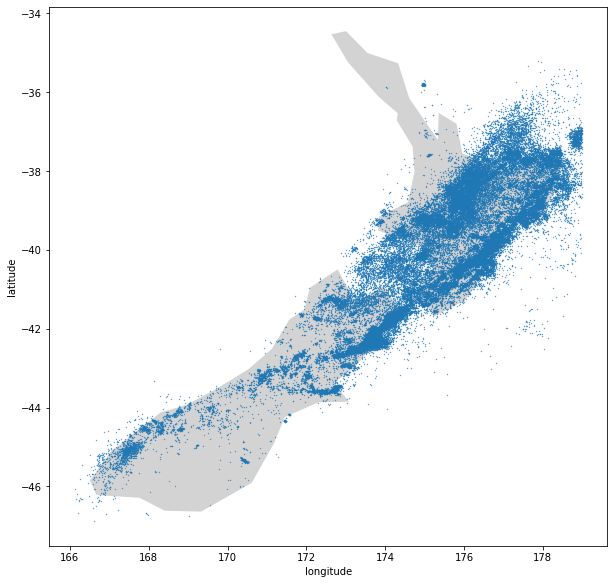

In [5]:
# plot earthquakes on NZ map
fig, ax = plt.subplots(figsize=(10,10))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = countries[countries["name"] == "New Zealand"].plot(color="lightgrey", ax=ax)
events_df.plot(x="longitude", y="latitude", kind="scatter", s=0.1, ax=ax)
plt.show()
del ax

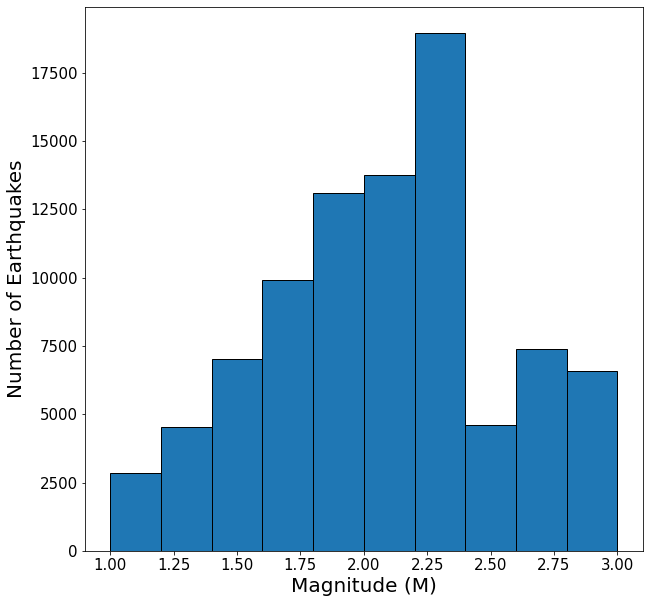

In [6]:
# plot magnitude
def plot_mag(df):
    fig, ax = plt.subplots(figsize=(10,10))
    w = 0.2
    n = np.ceil((df['magnitude'].max() - df['magnitude'].min())/w)
    plt.hist(df['magnitude'], histtype='bar', ec='black', bins=int(n))
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='both', labelsize=15)
    plt.ylabel('Number of Earthquakes', fontsize=20)
    plt.xlabel('Magnitude (M)', fontsize=20);
    del fig
    del ax
plot_mag(events_df)

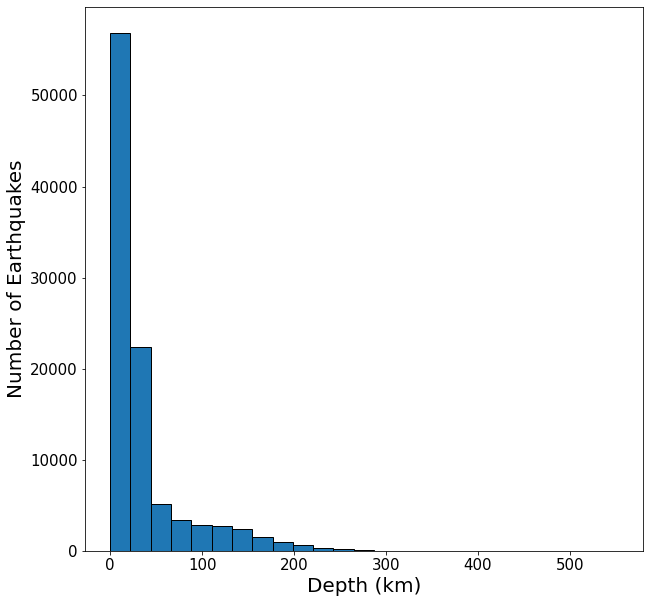

In [118]:
# plot depth
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(events_df['depth'], histtype='bar', ec='black', bins=25)
ax.tick_params(axis='both', labelsize=15)
ax.tick_params(axis='both', labelsize=15)
plt.ylabel('Number of Earthquakes', fontsize=20)
plt.xlabel('Depth (km)', fontsize=20);
del fig
del ax

In [119]:
# filter magnitude 1-3
events_df = events_df[(events_df.magnitude >= 1) & (events_df.magnitude <= 3)] # 
#filter depth < 200km (200000m)
#events_df = events_df[events_df.depth < 100000] #200000

In [122]:
# (106623)
events_df.shape

(88740, 7)

In [121]:
# save the processed df
events_df.to_pickle('data/events_processed.pkl')

In [7]:
events_df = pd.read_pickle('data/events_processed.pkl')
#events_df = events_df[events_df.depth > 70] # 
print(events_df.shape[0])
#events_df.to_pickle('data/events_deep_processed.pkl')

88740


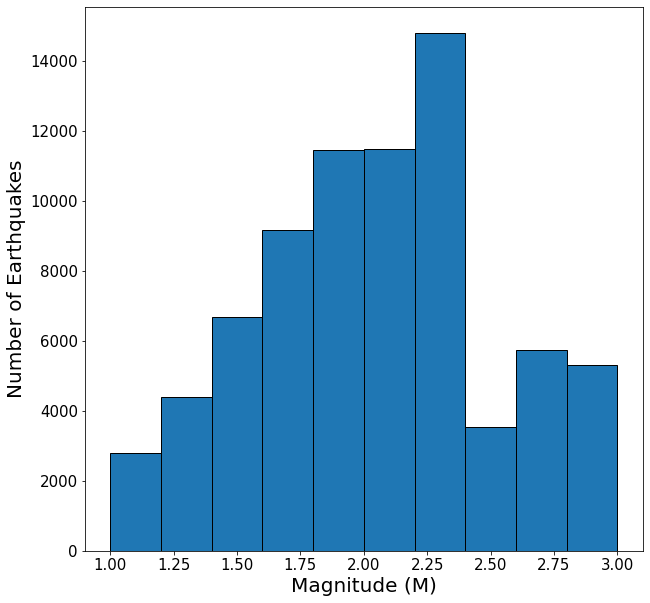

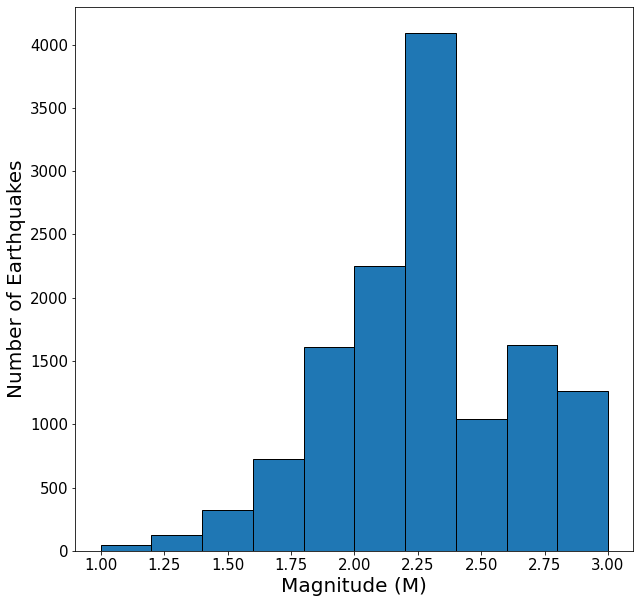

In [124]:
plot_mag(events_df[events_df['depth'] < 70])
plot_mag(events_df[events_df['depth'] > 70])

In [19]:
stations_df = pd.read_pickle('data/stations_processed.pkl')
stations_df.to_csv('data/stations.csv')

# Seismic Measurements

In [593]:
# normalize data between -1 and 1
def normalize_data(data):
    normalized = []
    xmin=min(data)
    xmax=max(data)
    for x in data:
        res = 2.0 * ((x - xmin) / (xmax - xmin)) - 1.0
        normalized.append(res)
    return normalized

# time -> 0 - 30 secs
def normalize_time(data):
    normalized = []
    xmin=min(data)
    xmax=max(data)
    for x in data:
        normalized.append(((x - xmin)/(xmax - xmin)) * 30) #30
    return normalized

    
# plot wave straight from mseed file
def plot_wave_mseed(data, times):
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(1, 1, 1)
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, len(data))]
    for i, (d, t) in enumerate(zip(data, times)):
        # get same amount of values per each station 
        new_time = t[:3001] #[:3001]
        # normalize
        new_time = normalize_time(new_time)
        #new_time = np.array(new_time)
        
        # downsample 100Hz to 50Hz
        #new_time = new_time[::4]
        new_data = d[:3001] #[:3001]
        #new_data = np.array(new_data)
        #new_data = np.array(normalize_data(new_data))
        #new_data = new_data[::10]
        #new_time = new_time[::10]
        ax.plot(new_time, new_data, color=colors[i])
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='both', labelsize=15)
    plt.ylabel('HHZ Normalized Velocity', fontsize=20)
    plt.xlabel('Timestep', fontsize=20);
    plt.grid()
    plt.show()
    del fig
    del ax

In [622]:
path = 'datasets/normal/waveforms/smi_nz.org.geonet'
inter = path + '/' + os.listdir(path)[0]
file = inter + '/' + os.listdir(inter)[0]
#/2016p000001/NZ.APZ.10.HHZ__20160101T000026Z__20160101T000056Z.mseed'
ex = read(file)
ex

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2015-12-31T00:01:01.288377Z - 2015-12-31T00:01:34.198377Z | 100.0 Hz, 3292 samples

In [642]:
inter = 'datasets/active/waveforms/smi_nz.org.geonet' + '/' + os.listdir(path)[20]
#inter = path + '/' + os.listdir(path)[2]
file = inter + '/' + os.listdir(inter)[0]
#ex2 = read('datasets/waveforms/smi:nz.org.geonet/2016p000001/NZ.BFZ.10.HHZ__20160101T000026Z__20160101T000056Z.mseed')
ex2 = read(file)
ex2

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2015-12-31T10:07:29.468394Z - 2015-12-31T10:08:00.688394Z | 100.0 Hz, 3123 samples

In [643]:
inter = path + '/' + os.listdir(path)[5]
file = inter + '/' + os.listdir(inter)[0]
#ex3 = read('datasets/waveforms/smi:nz.org.geonet/2016p000001/NZ.CVZ.10.HHZ__20160101T000026Z__20160101T000056Z.mseed')
ex3 = read(file)
ex3

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2015-12-31T01:33:39.128393Z - 2015-12-31T01:34:12.998393Z | 100.0 Hz, 3388 samples

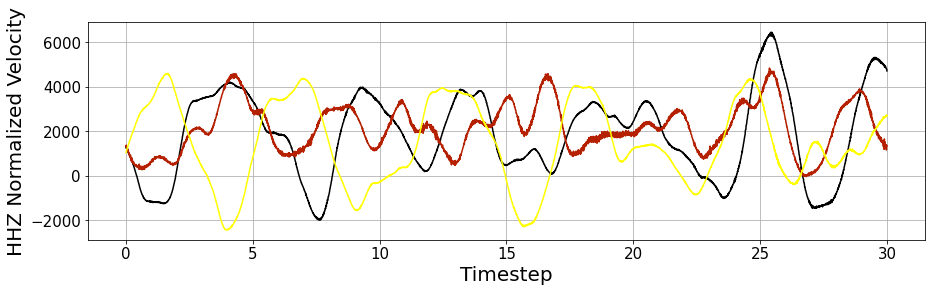

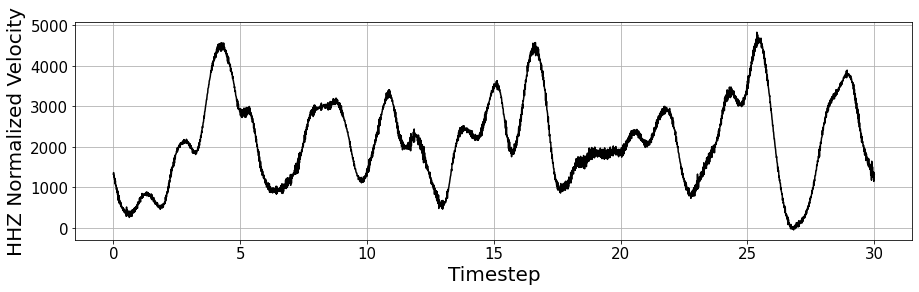

In [644]:
plot_wave_mseed(
                [ex[0].data, ex2[0].data, ex3[0].data], 
                [ex[0].times('matplotlib'), ex2[0].times('matplotlib'), ex3[0].times('matplotlib')]
               )
plot_wave_mseed([ex2[0].data], [ex2[0].times('matplotlib')])

# Preprocess Seismic Data

In [764]:
original_signal = 3001
new_signal = 301
reduction_factor = 10
time_arr = np.linspace(0.0, 30.0, 301)
time_arr.shape
norm = Normalizer()

In [765]:
def lower_hz(data, reduction_factor):
    return data[::reduction_factor][:new_signal]
    #return signal.resample(data, new_signal)
    #return block_reduce(data, block_size=reduction_factor, func=np.mean)
# preprocess event seismic data per each station
def normalize_all(data):
    for i, new_data in enumerate(data):
        data[i] = norm.transform(new_data)
def preprocess_data(data):
    new_data_arr = []
    for i, new_data in enumerate(data):
        if len(new_data) < original_signal:
            return None
        #new_data = Trace(np.array(new_data)).filter('lowpass', freq=0.5, corners=2, zerophase=True).data
        new_data = new_data[::reduction_factor]
        new_data = new_data[:new_signal]
        new_data_arr.append(new_data)
        
    #new_data_arr = norm.fit_transform(np.array(new_data_arr))
    norm.fit(np.array(new_data_arr))
    return np.array(new_data_arr)
#def preprocess_data(data):
#    new_data_arr = []
#    for i, d in enumerate(data):
#        # get same amount of values per each station 
#        #print(len(d))
#        new_data = d
#        # d[:original_signal]
#        new_data = lower_hz(new_data, reduction_factor)
#        # normalize
#        new_data = np.array(new_data)
#        new_data = normalize_data(new_data)
#        new_data = np.array(new_data)
#            
#        # downsample 100Hz to 10Hz
#        #new_data = new_data[::4]
#        
#        new_data_arr.append(new_data)
#        last_appended = new_data
#    
#    res = np.array(new_data_arr)
#    return res

In [766]:
# plot wave normal
def plot_wave_processed(data):
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(1, 1, 1)
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, len(data))]
    i = 0
    for s in data:
        ax.plot(time_arr, s, color=colors[i])
        i+=1
    ax.tick_params(axis='both', labelsize=15)
    ax.tick_params(axis='both', labelsize=15)
    plt.ylabel('HHZ Velocity', fontsize=20)
    plt.xlabel('Timestep', fontsize=20);
    plt.grid()
    plt.show()
    del fig
    del ax

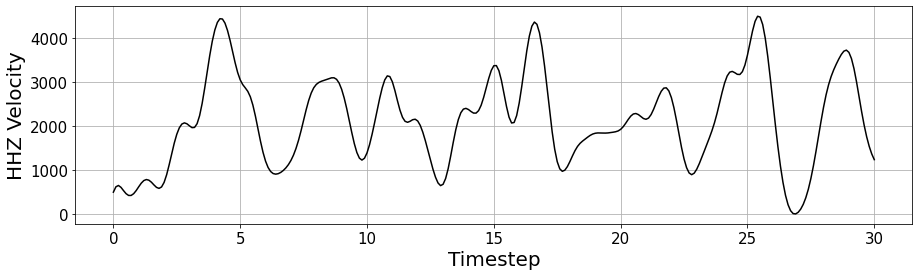

In [767]:
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

# There is only one trace in the Stream object, let's work on that trace...
tr = ex2[0]

# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=1.0, corners=2, zerophase=True)
plot_wave_processed(preprocess_data([tr_filt.data]))


In [768]:
fun = preprocess_data([ex[0].data, ex2[0].data, ex3[0].data])

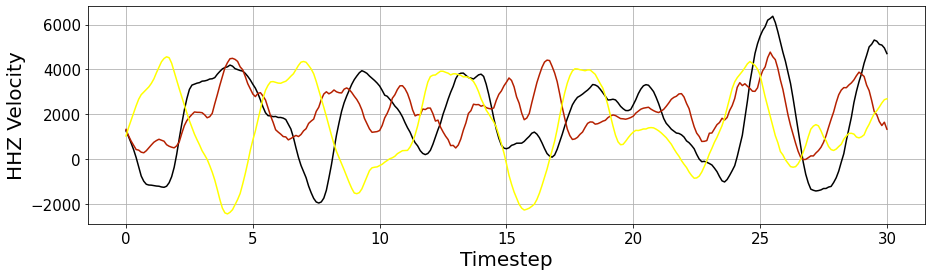

In [769]:
fun.shape
plot_wave_processed(fun)

In [770]:
os.getcwd()

'C:\\Programming\\Earthquake'

In [780]:
folder = "active" #active/normal
datasets_location = f'datasets/{folder}/waveforms/smi_nz.org.geonet/'
list_of_directories = os.listdir(datasets_location)
list_of_directories = list_of_directories[:500]
len(list_of_directories)

500

In [781]:
master_data_per_event = []
stations_to_get = 56#56

In [782]:
print(list_of_directories[-10:])
print(sorted(list_of_directories)[-10:])

['2016p024052', '2016p024378', '2016p024413', '2016p024421', '2016p024504', '2016p024551', '2016p024553', '2016p024600', '2016p024648', '2016p024940']
['2016p024052', '2016p024378', '2016p024413', '2016p024421', '2016p024504', '2016p024551', '2016p024553', '2016p024600', '2016p024648', '2016p024940']


In [783]:
# [0] -> 1st event, [1] -> 2nd event etc.

#events_processed = 0
#station_count = 0
#cur_path = os.path.join(os.getcwd(), datasets_location)
#
#for directory in list_of_directories:
#    
#    # station files for each event
#    cur_dir = os.path.join(cur_path, directory)
#    station_files = os.listdir(cur_dir)
#    station_files = [os.path.join(cur_dir, station) for station in station_files]
#    #print(len(station_files))
#    
#    # station data per event
#    station_data_arr = []
#    for i in range(0, len(station_files)):
#        
#        # break if we have 58 stations. Move to next event
#        if station_count == stations_to_get:
#            station_count = 0 # reset counter
#            break
#        
#        # cant read a station file, move to next station
#        try:
#            station_data = read(station_files[i])
#        except:
#            continue
#        
#        station_data = station_data[0].data
#        
#        # if corrupted data, continue to next station
#        min_data = min(station_data)
#        max_data = max(station_data)
#        if min_data == -14822981 or max_data == -14822981:
#            print("corrupted")
#            continue
#        else:
#            station_data_arr.append(station_data)
#            station_count += 1
#    #print(len(station_data_arr))
#    if len(station_data_arr) == stations_to_get:
#        station_data_processed = preprocess_data(station_data_arr)
#        master_data_per_event.append(station_data_processed)
#        station_count = 0
#    
#    
#    #if events_processed == 12000:#12000:
#    #    break
#        
#    events_processed += 1
#    
#    if events_processed % 1000 == 0:
#        print(events_processed)
#    
#    del station_data_arr
#
#    #os.chdir('../')

In [784]:
events_processed = 0
station_count = 0
cur_path = os.path.join(os.getcwd(), datasets_location)

for id_event, directory in enumerate(list_of_directories):
    
    # station files for each event
    cur_dir = os.path.join(cur_path, directory)
    station_files = os.listdir(cur_dir)
    station_files = [os.path.join(cur_dir, station) for station in station_files]
    
    if len(station_files) < stations_to_get:
        continue
    
    # station data per event
    n_to_read = min(len(station_files), stations_to_get)
    station_data_arr = [None] * n_to_read #np.zeros((n_to_read, original_signal))
    for i in range(0, n_to_read):
        station_data = read(station_files[i])[0].data
        
        # if corrupted data, continue to next station
        #min_data = min(station_data)
        #max_data = max(station_data)
        #if min_data == -14822981 or max_data == -14822981:
        #    print("corrupted")
        #    continue
        
        station_data_arr[i] = station_data
    
    station_data_processed = preprocess_data(station_data_arr)
    if station_data_processed is None:
        continue
    master_data_per_event.append(station_data_processed)
    
    if id_event % 500 == 0:
        print(id_event)
    
    del station_data_arr

    #os.chdir('../')
    
normalize_all(master_data_per_event)

0


In [787]:
len(master_data_per_event)
#len(master_data_per_event[0][1])

437

In [788]:
save_loc = os.path.join(os.getcwd(), f'datasets/{folder}/waveforms/100hz/') 
pickle.dump(master_data_per_event, open(save_loc + "normal_seismic_100hz.pkl", "wb"))

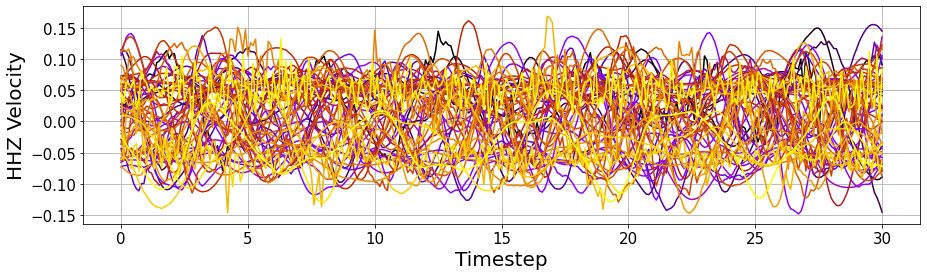

In [792]:
plot_wave_processed(master_data_per_event[2])

In [417]:
# READING EARTHQUAKE BEHAVIOUR
pkl_file = open('datasets/5hz/x_test.pkl', 'rb')
earthquakes_data = pickle.load(pkl_file)
pkl_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/5hz/x_test.pkl'

In [418]:
earthquakes_data.shape

NameError: name 'earthquakes_data' is not defined

In [ ]:
# READING NORMAL BEHAVIOUR
pkl_file = open('data/normal_seismic_2hz.pkl', 'rb')
normal_data = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
normal_data[0].shape

In [ ]:
plot_wave_processed(normal_data[0])

'/Users/irtazahashmi/Desktop/RP'